In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
colours = cm.viridis(np.linspace(0.25,0.75,5)) 

In [3]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))
Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [100]:
data_f.close()

NameError: name 'data_f' is not defined

In [98]:
data_f_2.close()

RuntimeError: Can't retrieve file id (Invalid object id)

In [73]:
data_f_3.close()

In [74]:
data_f_4.close()

NameError: name 'data_f_4' is not defined

In [5]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

No current data file, attempting to create...
C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/2018-10-17_with_100nm_NaCldep_upconversion.h5
opening file:  C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/2018-10-17_with_100nm_NaCldep_upconversion.h5


In [6]:
data_f_2 = df.open_file(set_current = False)
fname_2 = data_f_2.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/2018-11-29_noNPsfirst measure.h5


In [4]:
data_f_3 = df.open_file(set_current = False)
fname_3 = data_f_3.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/2018-10-17_with_100nm_NaCldep_upconversion.h5


In [1]:
data_f_4 = df.open_file(set_current = False)
fname_4 = data_f_4.filename

NameError: name 'df' is not defined

In [6]:
filelist = data_f['OceanOpticsSpectrometer']

In [7]:
filelist_2 = data_f_2['OceanOpticsSpectrometer']

In [5]:
filelist_3 = data_f_3['OceanOpticsSpectrometer']

In [8]:
D0_raw=data_f['OceanOpticsSpectrometer/Defect_0']
D0_PL_raw = data_f["OceanOpticsSpectrometer/Defect_4mW_0"]

NameError: name 'data_f' is not defined

In [81]:
reference = D0_raw.attrs['reference']
back = D0_raw.attrs['background']
wl = D0_raw.attrs['wavelengths']
e = 1243.1/wl

In [9]:
reference_2 = filelist_2.values()[0].attrs['reference']
back_2 = filelist_2.values()[0].attrs['background']
wl = filelist_2.values()[0].attrs['wavelengths']
e = 1243.1/wl

In [10]:
reference_3 = filelist_3.values()[0].attrs['reference']
back_3 = filelist_3.values()[0].attrs['background']
wl = filelist_3.values()[0].attrs['wavelengths']
e = 1243.1/wl

In [11]:
data_s2 = []
for i in range (0, len(filelist_2.values())):
    df_2 = (filelist_2.values()[i].value - back_2)/(reference_2-back_2)
    data_s2.append(df_2)

data_s2_norm = []
for i in range(0, len(filelist_2.values())):
    df_2_norm = (filelist_2.values()[i] - back_2)/(reference_2 - back_2)
    data_s2_norm.append(df_2_norm)

In [12]:
data_w_ts = []
data_w_ts_raw = []
for i in range (0, len(filelist_3.values())):
    df_NPs = (filelist_3.values()[i].value - back_3)/(reference_3-back_3)
    df_NPs_raw = (filelist_3.values()[i].value - back_3)
    current_timestamp =  datetime.datetime.strptime(
                filelist_3.values()[i].attrs['creation_timestamp'][:19], "%Y-%m-%dT%H:%M:%S")
    s = (current_timestamp-datetime.datetime(1970,1,1)).total_seconds()
    df_NPs_w_ts = np.append(df_NPs, s)
    df_NPs_w_ts_raw = np.append(df_NPs_raw, s)
    data_w_ts.append(df_NPs_w_ts)
    data_w_ts_raw.append(df_NPs_w_ts_raw)
    


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


In [13]:
data_w_ts_sorted = sorted(data_w_ts,key=lambda x: x[-1])
data_sorted = np.array(data_w_ts_sorted)[:,:len(data_w_ts_sorted[0])-1]

data_w_ts_sorted_raw = sorted(data_w_ts_raw,key=lambda x: x[-1])
data_sorted_raw = np.array(data_w_ts_sorted_raw)[:,:len(data_w_ts_sorted_raw[0])-1]

NameError: name 'D0_raw' is not defined

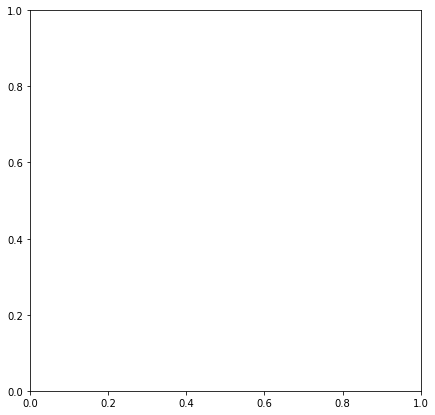

In [24]:
fig1, ax1 = plt.subplots(figsize = (7,7))

D0 = (D0_raw - back)/(reference - back)
D0_n = D0/np.linalg.norm(D0[150:800], axis=0, ord = np.inf)
D0_PL = (D0_PL_raw - back)/(reference - back)
D0_PL_n = D0_PL/np.linalg.norm(D0_PL[150:800], axis=0, ord = np.inf)

D0_n_sm = sig.savgol_filter(D0_n, 23,3)
D0_PL_n_sm = sig.savgol_filter(D0_PL_n, 23,3)

ax1.plot(wl, D0_n_sm, label = "Defect 0 scattering")

ax1.plot(wl, D0_PL_n_sm, label = "3.22mW emission")

np.linalg.norm(D0[150:1000], axis=0, ord = np.inf)

#ax1.set_ylim(0,0.25)
ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.005,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_0_abs_em.png', bbox_inches='tight')

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.


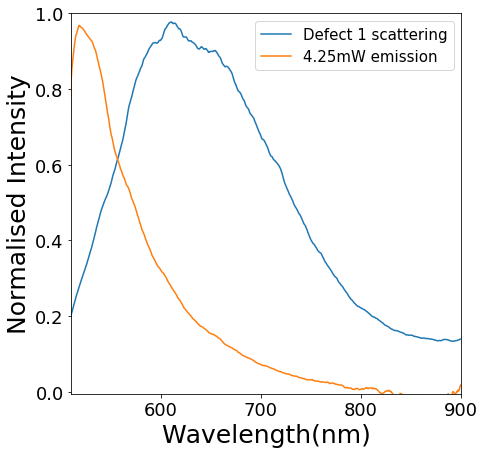

In [12]:
D1_raw=data_f['OceanOpticsSpectrometer/Defect_2_0']

D1_PL_raw = data_f["OceanOpticsSpectrometer/Defect_2_5mW_realigned_0"]

fig1, ax1 = plt.subplots(figsize = (7,7))


D1 = (D1_raw - back)/(reference - back)
D1_n = D1/np.linalg.norm(D1[150:800], axis = 0, ord=np.inf)
D1_PL = (D1_PL_raw - back)/(reference - back)
D1_PL_n = D1_PL/np.linalg.norm(D1_PL[150:800], axis=0, ord = np.inf)

D1_n_sm = sig.savgol_filter(D1_n, 23,3)
D1_PL_n_sm = sig.savgol_filter(D1_PL_n, 23,3)

ax1.plot(wl, D1_n_sm, label = "Defect 1 scattering")

ax1.plot(wl, D1_PL_n_sm, label = "4.25mW emission")

#ax1.set_ylim(0,0.25)
ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.005,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_1_abs_em.png',  bbox_inches='tight')



C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.


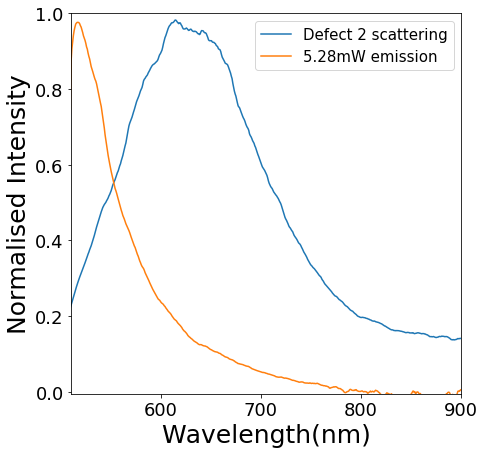

In [13]:
D2_raw=data_f['OceanOpticsSpectrometer/Defect_3_0']

D2_PL_raw = data_f["OceanOpticsSpectrometer/Defect_3_6mW_0"]

fig1, ax1 = plt.subplots(figsize = (7,7))


D2 = (D2_raw - back)/(reference - back)
D2_n = D2/np.linalg.norm(D2[150:800], axis=0, ord = np.inf)
D2_PL = (D2_PL_raw - back)/(reference - back)
D2_PL_n = D2_PL/np.linalg.norm(D2_PL[150:800], axis=0, ord = np.inf)

D2_n_sm = sig.savgol_filter(D2_n, 23,3)
D2_PL_n_sm = sig.savgol_filter(D2_PL_n, 23,3)

ax1.plot(wl, D2_n_sm, label = "Defect 2 scattering")

ax1.plot(wl, D2_PL_n_sm, label = "5.28mW emission")

ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.005,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_2_abs_em.png', bbox_inches='tight' )



C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


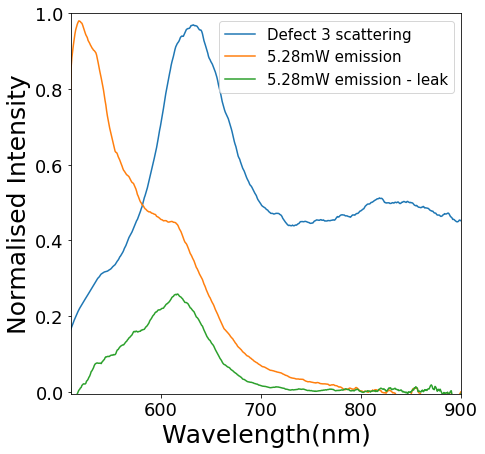

In [14]:
D3_raw=data_f['OceanOpticsSpectrometer/Defect_4_0']

D3_PL_raw = data_f["OceanOpticsSpectrometer/Defect_4_6mW_0"]

fig1, ax1 = plt.subplots(figsize = (7,7))


D3 = (D3_raw - back)/(reference - back)
D3_n = D3/np.linalg.norm(D3[150:800], axis=0, ord = np.inf)
D3_PL = (D3_PL_raw - back)/(reference - back)
D3_PL_n = D3_PL/np.linalg.norm(D3_PL[150:800], axis=0, ord = np.inf)
D3_noleak = D3_PL_n - D2_PL_n 

D3_n_sm = sig.savgol_filter(D3_n, 23,3)
D3_PL_n_sm = sig.savgol_filter(D3_PL_n, 23,3)
D3_noleak_sm = sig.savgol_filter(D3_noleak, 23,3)


ax1.plot(wl, D3_n_sm, label = "Defect 3 scattering")
ax1.plot(wl, D3_PL_n_sm, label = "5.28mW emission")
ax1.plot(wl, D3_noleak_sm, label = "5.28mW emission - leak")

ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.005,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_3_abs_em.png',bbox_inches='tight')



C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


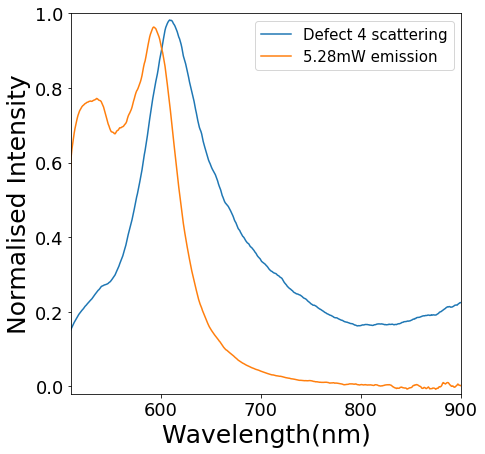

In [17]:
D4_raw=data_f['OceanOpticsSpectrometer/Defect_1']

D4_PL_raw = data_f["OceanOpticsSpectrometer/Defect_6mW_0"]

fig1, ax1 = plt.subplots(figsize = (7,7))


D4 = (D4_raw - back)/(reference - back)
D4_n = D4/np.linalg.norm(D4[150:800], axis=0, ord = np.inf)
D4_PL = (D4_PL_raw - back)/(reference - back)
D4_PL_n = D4_PL/np.linalg.norm(D4_PL[150:800], axis=0, ord = np.inf)
D4_noleak = D4_PL_n - D2_PL_n 

D4_n_sm = sig.savgol_filter(D4_n, 23,3)
D4_PL_n_sm = sig.savgol_filter(D4_PL_n, 23,3)
D4_noleak_sm = sig.savgol_filter(D4_noleak, 23,3)

ax1.plot(wl, D4_n_sm, label = "Defect 4 scattering")
ax1.plot(wl, D4_PL_n_sm, label = "5.28mW emission")
ax1.plot(wl, D4_noleak_sm, label = "5.28mW emission - leak")

ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.02,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_abs_em.png', bbox_inches='tight')



In [67]:
min(D4_noleak[150:400])

-0.25041363225032531

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWar

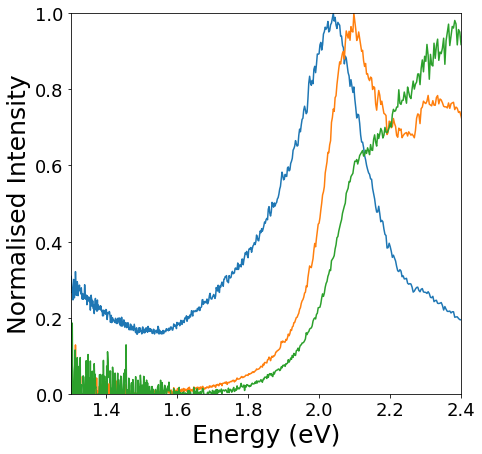

In [108]:
D4_raw=data_f['OceanOpticsSpectrometer/Defect_1']
D4_PL_raw = data_f["OceanOpticsSpectrometer/Defect_6mW_0"]
D4 = (D4_raw - back)/(reference - back)
D4_PL = (D4_PL_raw - back)/(reference - back) #Have to correct for laser leak
D4_nf = (D4_PL-D1_PL)/D4
D4_n = D4/np.linalg.norm(D4[150:800], axis=0, ord = np.inf)
D4_PL_n = D4_PL/np.linalg.norm(D4_PL[150:800], axis=0, ord = np.inf)
D4_nf_n = D4_nf/np.linalg.norm(D4_nf[150:800], axis=0, ord = np.inf)

D4_n_sm = sig.savgol_filter(D4_n, 23,3)
D4_PL_n_sm = sig.savgol_filter(D4_PL_n, 23,3)
D4_noleak_sm = sig.savgol_filter(D4_noleak, 23,3)

fig1, ax1 = plt.subplots(figsize = (7,7))

ax1.plot(e, D4_n, label = "Defect 4 scattering")
ax1.plot(e, D4_PL_n, label = "5.28mW emission")
ax1.plot(e, D4_nf_n, label = "Minimum energy far field")
#ax1.plot(e, D4_PL - D1_PL)
#ax1.plot(wl, D4_noleak_sm, label = "5.28mW emission - leak")

ax1.set_xlim(1.3, 2.4)
ax1.set_ylabel("Normalised Intensity", fontsize = "25")
ax1.set_xlabel("Energy (eV)", fontsize = 25)
#ax1.legend(fontsize = 15, loc = "lower left")
ax1.set_ylim(0,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

#fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_abs_em.png', bbox_inches='tight')



C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


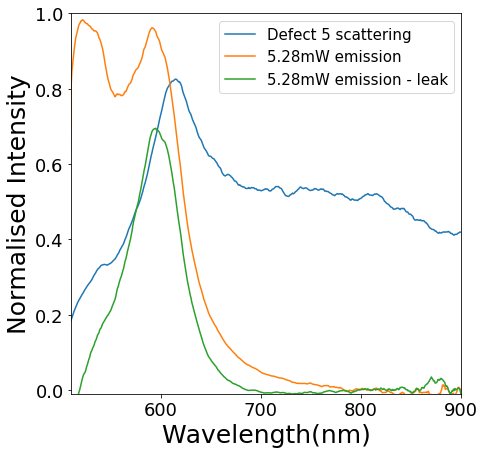

In [719]:
D5_raw=data_f['OceanOpticsSpectrometer/Defect_3']

D5_PL_raw = data_f["OceanOpticsSpectrometer/Defect_3_5.28mW_0"]

fig1, ax1 = plt.subplots(figsize = (7,7))


D5 = (D5_raw - back)/(reference - back)
D5_n = D5/np.linalg.norm(D3[150:800], axis=0, ord = np.inf)
D5_PL = (D5_PL_raw - back)/(reference - back)
D5_PL_n = D5_PL/np.linalg.norm(D5_PL[150:800], axis=0, ord = np.inf)
D5_noleak = D5_PL_n - D2_PL_n 


D5_n_sm = sig.savgol_filter(D5_n, 23,3)
D5_PL_n_sm = sig.savgol_filter(D5_PL_n, 23,3)
D5_noleak_sm = sig.savgol_filter(D5_noleak, 23,3)

ax1.plot(wl, D5_n_sm, label = "Defect 5 scattering")

ax1.plot(wl, D5_PL_n_sm, label = "5.28mW emission")
ax1.plot(wl, D5_noleak_sm, label = "5.28mW emission - leak")

ax1.set_xlim(510, 900)
ax1.set_ylabel("Normalised Intensity", fontsize = 25)
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(-0.01,1)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_5_abs_em.png',  bbox_inches='tight')



In [722]:
start_time_tot = datetime.datetime.strptime('2018-10-17T14:47:47.546000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")
finish_time_tot = datetime.datetime.strptime('2018-10-17T17:10:05.984000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")

In [790]:
#Sort and filter all data according to their timestamp and restrict wavelength range

#Restrict wavelengths to sensible values
wavelength_start = 510; wavelength_end = 900;
data_start = (np.abs(wl - wavelength_start)).argmin()
data_end = (np.abs(wl - wavelength_end)).argmin()
wavelengths = wl[data_start:data_end]

#Create array to hold data with corresponding time value
all_data_w_time = []

#Iterate through data set and make array with data in one column and timestamp in the other
for data_set in filelist.values():
    
    t = datetime.datetime.strptime(
                        data_set.attrs['creation_timestamp'][:19], "%Y-%m-%dT%H:%M:%S")
    
    data = (data_set.value - back)/(reference-back)
    data = data[data_start:data_end]
    
    if t >= start_time_tot and t <= finish_time_tot: #Make sure you choose the right start and finish time

        s = (t-datetime.datetime(1970,1,1)).total_seconds()

        data_w_time = np.append(data, s)
        all_data_w_time.append(data_w_time)
    
#Sort all the data vs timestamp   
all_data_w_time_sorted = sorted(all_data_w_time,key=lambda x: x[-1])
all_data_w_time_sorted = np.delete(all_data_w_time_sorted, -1,1) #Delete the timestamp column of data


#Filter the data to help define peaks
all_data_filtered = []
for i in range(0, len(all_data_w_time_sorted)):
    filt_data = sig.savgol_filter(all_data_w_time_sorted[i],23,3)
    all_data_filtered.append(filt_data)

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in divide


In [791]:
#Decides how the normalisation is done for unsmoothed data
norm_start_wl = 510; #Wavelength to normalised from
norm_fin_wl =750
norm_start = (np.abs(wavelengths - norm_start_wl)).argmin()
norm_fin = (np.abs(wavelengths - norm_fin_wl)).argmin()
norm_data = []

for i in range(0, len(all_data_w_time_sorted)):
    inf_norm = np.linalg.norm(all_data_w_time_sorted[i][norm_start:norm_fin], axis=0, ord = np.inf)
    norm_data.append(all_data_w_time_sorted[i][norm_start:norm_fin]/inf_norm)

In [792]:
#Find peaks in data for unsmoothed and normalised data
thresh_guess = 0.5
lw_guess = 40
peak_wls_norm = []
peak_ints_norm = []

for i in range(0, len(norm_data)):
    peak_indexes = peakutils.indexes( norm_data[i],thres = thresh_guess, min_dist = lw_guess*2)
    peak_wls_norm.append(wavelengths[peak_indexes])
    peak_ints_norm.append(norm_data[i][peak_indexes])  

peak_wls_norm = np.array(peak_wls_norm)#
peak_ints_norm = np.array(peak_ints_norm)

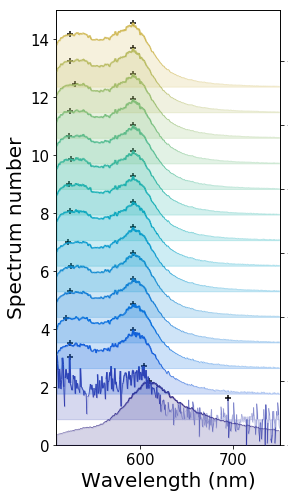

In [830]:
#Plot the raw data

#This factor defines the offset between each spectrum in the graph
mega_fact = 0.4
#This calls the function which adds the offset
all_data_norm_os = Alex_plot.offset_spectra(norm_data[-28:-12], mega_fact)
peak_wls_norm_1 = peak_wls_norm[-28:-12]
peak_ints_norm_1 = peak_ints_norm[-28:-12]
norm_wls = wavelengths[norm_start:norm_fin]

fig1 = plt.figure(1, figsize = (4,0.5*len(all_data_norm_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(all_data_norm_os)))
for i in range(0, len(all_data_norm_os)-1):
    lwidths = (all_data_norm_os[i] - i*mega_fact)*2
    points = np.array([norm_wls , all_data_norm_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_norm_os[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(norm_wls))*i*mega_fact
    ax1b.fill_between(norm_wls , spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    ax1b.scatter(peak_wls_norm_1[i], peak_ints_norm_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(norm_start_wl, norm_fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Spectrum number", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,spec_no)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_powerss.png',  bbox_inches='tight')


In [831]:
#Decides how the normalisation is done for smoothed data
norm_start_wl_sm = 510; #Wavelength to normalised from
norm_fin_wl_sm =750
norm_start_sm = (np.abs(wavelengths - norm_start_wl_sm)).argmin()
norm_fin_sm = (np.abs(wavelengths - norm_fin_wl_sm)).argmin()
norm_data_sm = []

for i in range(0, len(all_data_filtered)):
    inf_norm = np.linalg.norm(all_data_filtered[i][norm_start_sm:norm_fin_sm], axis=0, ord = np.inf)
    norm_data_sm.append(all_data_filtered[i][norm_start_sm:norm_fin_sm]/inf_norm)

In [832]:
#Find peaks in data for unsmoothed and normalised data
thresh_guess_sm = 0.5
lw_guess_sm = 40
peak_wls_norm_sm = []
peak_ints_norm_sm = []

for i in range(0, len(norm_data_sm)):
    peak_indexes_sm = peakutils.indexes(norm_data_sm[i],thres = thresh_guess_sm, min_dist = lw_guess_sm*2)
    peak_wls_norm_sm.append(wavelengths[peak_indexes_sm])
    peak_ints_norm_sm.append(norm_data_sm[i][peak_indexes_sm])  

peak_wls_norm_sm = np.array(peak_wls_norm_sm)#
peak_ints_norm_sm = np.array(peak_ints_norm_sm)

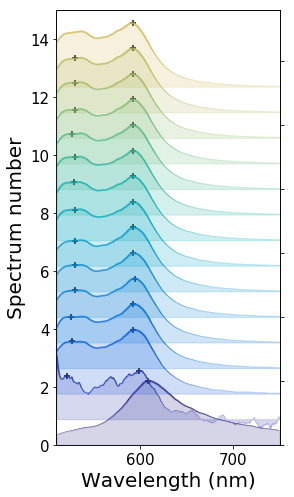

In [834]:
#Plot the smoothed data

#This factor defines the offset between each spectrum in the graph
mega_fact = 0.4
#This calls the function which adds the offset
all_data_filtered_norm_os = Alex_plot.offset_spectra(norm_data_sm[-28:-12], mega_fact)
peak_wls_norm_sm_1 = peak_wls_norm_sm[-28:-12]
peak_ints_norm_sm_1 = peak_ints_norm_sm[-28:-12]
norm_wls = wavelengths[norm_start_sm:norm_fin_sm]

fig1 = plt.figure(1, figsize = (4,0.5*len(all_data_filtered_norm_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(all_data_filtered_norm_os)))
for i in range(0, len(all_data_filtered_norm_os)-1):
    lwidths = (all_data_filtered_norm_os[i] - i*mega_fact)*2
    points = np.array([norm_wls , all_data_filtered_norm_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_filtered_norm_os[i], dtype = float)
    spec2 = np.ones(len(norm_wls))*i*mega_fact
    ax1b.fill_between(norm_wls , spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    ax1b.scatter(peak_wls_norm_sm_1[i], peak_ints_norm_sm_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(norm_start_wl, norm_fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Spectrum number", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,spec_no)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_powers_sm.png',  bbox_inches='tight')


In [797]:
#Make array of powers used 
P = [0.14, 1.17, 2.2, 3.22, 4.25, 5.28, 5.28, 6.26, 7.28, 8.31, 9.34, 15, 20, 30]
PL_peaks_1 = []
PL_peaks_0 = []
for i in range(1, len(peak_wls_norm_sm_1)-2):
    PL_peaks_1 = np.append(PL_peaks_1, peak_wls_norm_sm_1[i][1])
    PL_peaks_0 = np.append(PL_peaks_0, peak_wls_norm_sm_1[i][0])

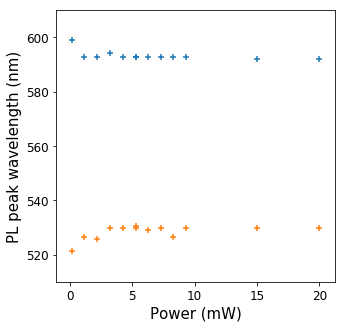

In [835]:
fig1 = plt.figure(1, figsize = (5,5))
ax1 = fig1.add_subplot(111)
ax1.scatter(P[:-1], PL_peaks_1, marker = "+")
ax1.scatter(P[:-1], PL_peaks_0, marker = "+")
ax1.set_ylim([510, 610])
ax1.set_ylabel("PL peak wavelength (nm)", fontsize = 15)
ax1.set_xlabel("Power (mW)", fontsize = 15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_pk_wl_vs_P_sm.png',  bbox_inches='tight')


In [843]:
#Find peaks in data for unsmoothed raw data
thresh_guess = 0.5
lw_guess = 40
peak_wl_store_r_1 = []
peak_int_store_r_1 = []

for i in range(0, len(all_data_w_time_sorted)):
    peak_indexes = peakutils.indexes(all_data_w_time_sorted[i],thres = thresh_guess, min_dist = lw_guess*2)
    peak_wl_store_r_1.append(wavelengths[peak_indexes])
    peak_int_store_r_1.append(all_data_w_time_sorted[i][peak_indexes])  

peak_wl_store_r_1 = np.array(peak_wl_store_r_1)
peak_int_store_r_1 = np.array(peak_int_store_r_1)

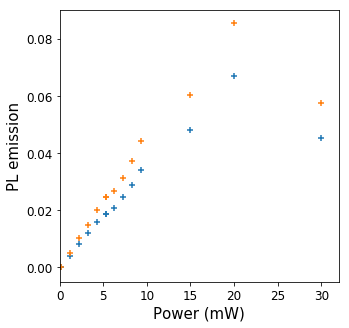

In [846]:
peak_int_store_r_1 = peak_int_store[-28:-12]

PL_ints_0 = []
PL_ints_1 = []
for i in range(1, len(peak_wls_norm_sm_1)-1):
    PL_ints_0 = np.append(PL_ints_0, peak_int_store_r_1[i][0])
    PL_ints_1 = np.append(PL_ints_1, peak_int_store_r_1[i][1])

corr_0 = PL_ints_0[5]-PL_ints_0[6]
corr_1 = PL_ints_1[5]-PL_ints_1[6]
PL_ints_0_corr = PL_ints_0
PL_ints_1_corr = PL_ints_1
    
for i in range(0, len(PL_ints_0)):
    if i <= 5:
        pass
    elif i >= 5:
        PL_ints_0_corr[i] = PL_ints_0_corr[i] + corr_0
        PL_ints_1_corr[i] = PL_ints_1_corr[i] + corr_1
    
fig1 = plt.figure(1, figsize = (5,5))
ax1 = fig1.add_subplot(111)
ax1.scatter(P, PL_ints_0_corr, marker = "+")
ax1.scatter(P, PL_ints_1_corr, marker = "+")
ax1.set_ylabel("PL emission", fontsize = 15)
ax1.set_xlabel("Power (mW)", fontsize = 15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlim([0,32])
ax1.set_ylim([-0.005,0.09])

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_4_pk_int_vs_P_sm.png',  bbox_inches='tight')


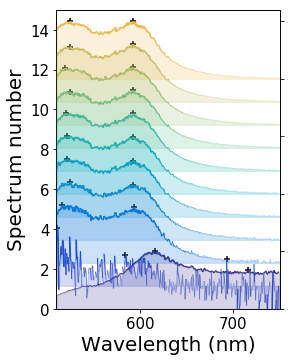

In [838]:
#Plot the raw data

#This factor defines the offset between each spectrum in the graph
mega_fact = 0.4
#This calls the function which adds the offset
all_data_norm_os_2 = Alex_plot.offset_spectra(norm_data[-11:], mega_fact)
peak_wls_norm_2 = peak_wls_norm[-11:]
peak_ints_norm_2 = peak_ints_norm[-11:]
norm_wls_2 = wavelengths[norm_start:norm_fin]

fig1 = plt.figure(1, figsize = (4,0.5*len(all_data_norm_os_2)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(all_data_norm_os_2)))
for i in range(0, len(all_data_filtered_norm_os_2)):
    lwidths = (all_data_norm_os_2[i] - i*mega_fact)*2
    points = np.array([norm_wls_2 , all_data_norm_os_2[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_norm_os_2[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(norm_wls_2))*i*mega_fact
    ax1b.fill_between(norm_wls_2 , spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    ax1b.scatter( peak_wls_norm_2[-11:][i], peak_ints_norm_2 [i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(norm_start_wl, norm_fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Spectrum number", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,spec_no)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

In [839]:
#Make array of powers used 
P_2 = [0.14, 1.17, 2.2, 3.22, 4.25, 5.28, 6.26, 7.28, 8.31, 9.34]
PL_peaks_0_2 = []
PL_peaks_1_2 = []
for i in range(1, len(peak_wls_norm_2)-1):
    PL_peaks_0_2 = np.append(PL_peaks_0_2, peak_wls_norm_2[i][1])
    PL_peaks_1_2 = np.append(PL_peaks_1_2, peak_wls_norm_2[i][0])

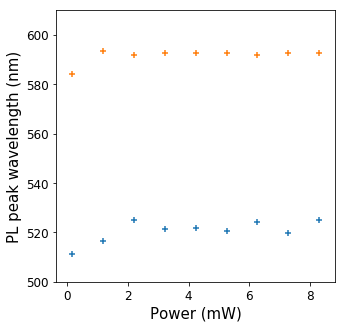

In [848]:
fig1 = plt.figure(1, figsize = (5,5))
ax1 = fig1.add_subplot(111)
ax1.scatter(P_2[:-1], PL_peaks_1_2, marker = "+")
ax1.scatter(P_2[:-1], PL_peaks_0_2, marker = "+")
ax1.set_ylim([500, 610])
ax1.set_ylabel("PL peak wavelength (nm)", fontsize = 15)
ax1.set_xlabel("Power (mW)", fontsize = 15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_5_pk_wl_vs_P_sm.png',  bbox_inches='tight')


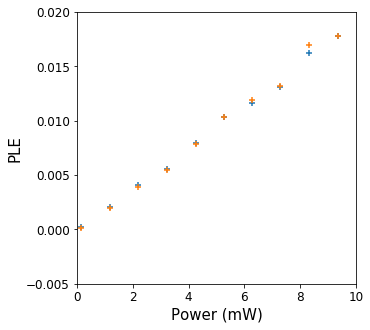

In [847]:
peak_ints_2 = peak_int_store[-11:]

PL_ints_0_2 = []
PL_ints_1_2 = []
for i in range(1, len(peak_ints_2)):
    PL_ints_0_2 = np.append(PL_ints_0_2, peak_ints_2[i][0])
    PL_ints_1_2 = np.append(PL_ints_1_2, peak_ints_2[i][1])

fig1 = plt.figure(1, figsize = (5,5))
ax1 = fig1.add_subplot(111)
ax1.scatter(P_2, PL_ints_0_2, marker = "+")
ax1.scatter(P_2, PL_ints_1_2, marker = "+")
ax1.set_ylabel("PLE", fontsize = 15)
ax1.set_xlabel("Power (mW)", fontsize = 15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlim([0,10])
ax1.set_ylim([-0.005,0.02])

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_5_pk_int_vs_P_sm.png',  bbox_inches='tight')


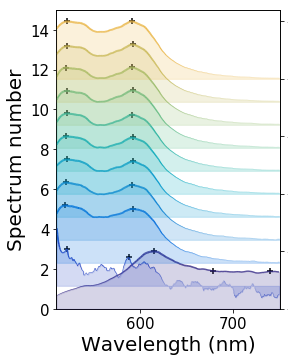

In [849]:
#Plot the smoothed normalised data

#This factor defines the offset between each spectrum in the graph
mega_fact = 0.4
#This calls the function which adds the offset
all_data_norm_os_2_sm = Alex_plot.offset_spectra(norm_data_sm[-11:], mega_fact)
peak_wls_norm_2_sm = peak_wls_norm_sm[-11:]
peak_ints_norm_2_sm = peak_ints_norm_sm[-11:]
norm_wls_2_sm = wavelengths[norm_start_sm:norm_fin_sm]

fig1 = plt.figure(1, figsize = (4,0.5*len(all_data_norm_os_2_sm)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(all_data_norm_os_2_sm)))
for i in range(0, len(all_data_norm_os_2_sm)):
    lwidths = (all_data_norm_os_2_sm[i] - i*mega_fact)*2
    points = np.array([norm_wls_2 , all_data_norm_os_2_sm[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_norm_os_2_sm[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(norm_wls_2_sm))*i*mega_fact
    ax1b.fill_between(norm_wls_2_sm , spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    ax1b.scatter( peak_wls_norm_2_sm[i], peak_ints_norm_2_sm[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(norm_start_wl, norm_fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Spectrum number", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,spec_no)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_5_powers_sm.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in divide


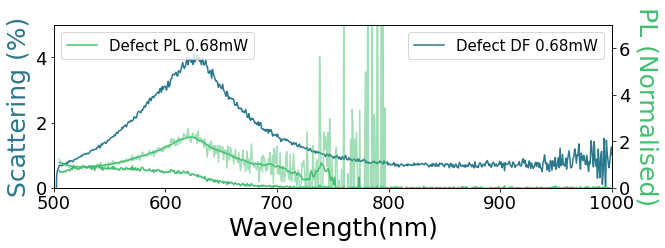

In [332]:
#fig1, ax1 = plt.subplots(figsize = (7,7))
#D1_s2 = data_s2[0]
#D1_s2_PL = data_s2[12]

fig1, ax1 = plt.subplots(figsize = (10,3))
NP1_PL = data_s2[12]*(reference_2 - back_2)
NP1_PL_scat = data_s2[12]
NP1_DF = data_s2[0] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "Defect DF 0.68mW", color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[350], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[350])
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "Defect PL 0.68mW", color = colours_1[350])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/Defect 600nm 0.68mW.png',  bbox_inches='tight')



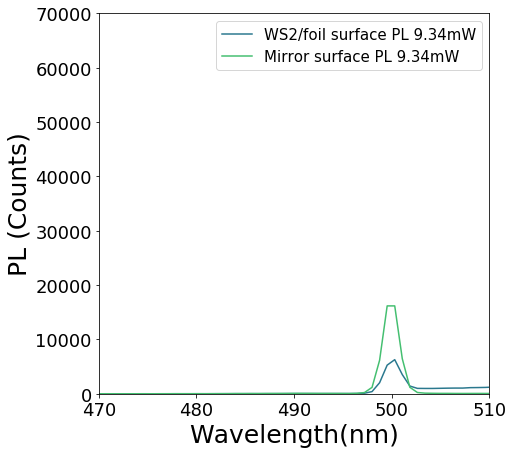

In [19]:
fig1, ax1 = plt.subplots(figsize = (7,7))
WS2_surf_leak = data_s2[25]
Mir_surf_leak = data_s2[33]

ax1.plot(wl, WS2_surf_leak*(reference_2 - back_2), label = "WS2/foil surface PL 9.34mW", color = colours_1[200])
ax1.plot(wl, Mir_surf_leak*(reference_2 - back_2), label = "Mirror surface PL 9.34mW", color = colours_1[350])
ax1.set_xlim(470, 510)
ax1.set_ylabel("PL (Counts)", fontsize = 25)
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(0,70000)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/Leak comparison.png',  bbox_inches='tight')


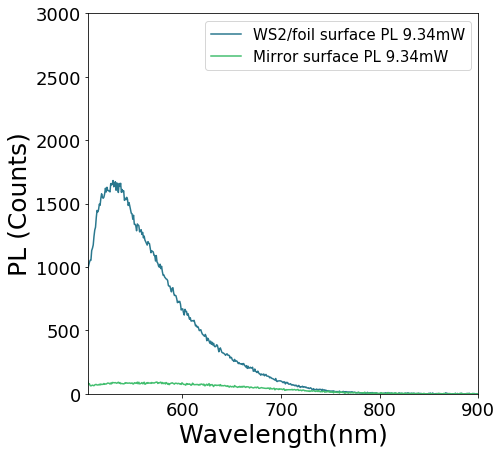

In [21]:
fig1, ax1 = plt.subplots(figsize = (7,7))
WS2_surf_PL = data_s2[25]
Mir_surf_PL = data_s2[33]

ax1.plot(wl, WS2_surf_PL*(reference_2 - back_2), label = "WS2/foil surface PL 9.34mW", color = colours_1[200])
ax1.plot(wl, Mir_surf_PL*(reference_2 - back_2), label = "Mirror surface PL 9.34mW", color = colours_1[350])

ax1.set_xlim(504, 900)
ax1.set_ylabel("PL (Counts)", fontsize = 25)
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(0,3000)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/WS2 surface vs mirror.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


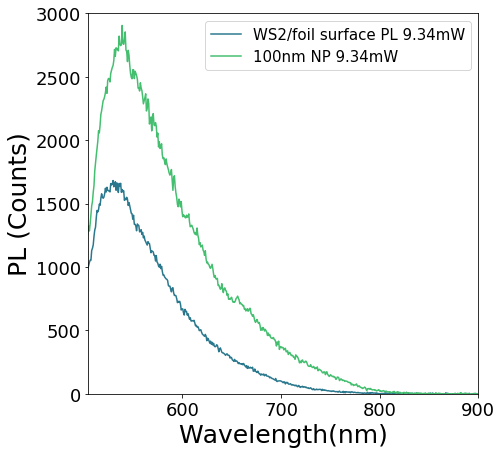

In [23]:


fig1, ax1 = plt.subplots(figsize = (7,7))
WS2_surf_PL = data_s2[25]
Mir_surf_PL = data_s2[33]

#Multiplication of WS2_surf_PL remove reference and therefore gives simply counts

ax1.plot(wl, WS2_surf_PL*(reference_2 - back_2), label = "WS2/foil surface PL 9.34mW", color = colours_1[200])
ax1.plot(wl, data_sorted[232]*(reference_3 - back_3), label = "100nm NP 9.34mW", color = colours_1[350])
ax1.set_xlim(504, 900)
ax1.set_ylabel("PL (Counts)", fontsize = 25)
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(0,3000)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/WS2 surface vs 100nm NP.png',  bbox_inches='tight')


In [ ]:
#Normalising the reference from 9.34mW so that it can be used for all the data sets

fig1, ax1 = plt.subplots(figsize = (7,7))
WS2_surf_PL = data_s2[25]
Mir_surf_PL = data_s2[33]

ax1.plot(wl, WS2_surf_PL*(reference_3 - back_3), label = "WS2/foil surface PL 9.34mW", color = colours_1[200])
ax1.plot(wl, data_sorted[232]*(reference_2 - back_2), label = "100nm NP 9.34mW", color = colours_1[350])
ax1.set_xlim(504, 900)
ax1.set_ylabel("PL (Counts)", fontsize = 25)
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.legend(fontsize = 15)
ax1.set_ylim(0,3000)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/WS2 surface vs 100nm NP.png',  bbox_inches='tight')

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


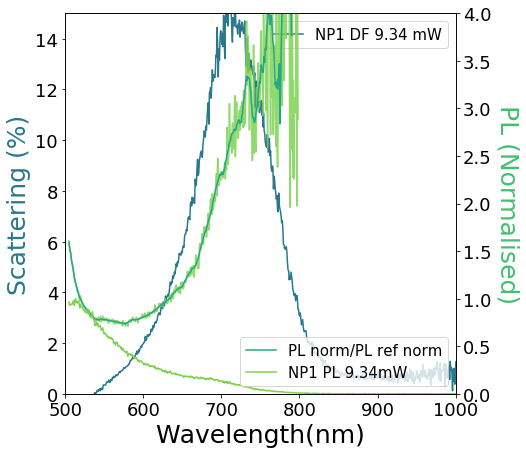

In [327]:
fig1, ax1 = plt.subplots(figsize = (7,7))
NP1_PL = data_s2[20]*(reference_3 - back_3)
NP1_PL_scat = data_s2[20]
NP1_DF = data_s2[19]- NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,3)

#ax1.plot(wl_ref_norm, pl_ref_norm)
ax2 = ax1.twinx()
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[400], alpha = 0.6)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[400], alpha = 0.6)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax1.plot(wl, NP1_DF*100, color = colours_1[200], label = "NP1 DF 9.34 mW")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 9.34mW", color = colours_1[400])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,15)
ax1.legend(fontsize = 15, loc = "upper right")
ax2.set_ylim(0,4)
ax2.legend(fontsize = 15, loc = "lower right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/Defect700_9.34mW.png',  bbox_inches='tight')



C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


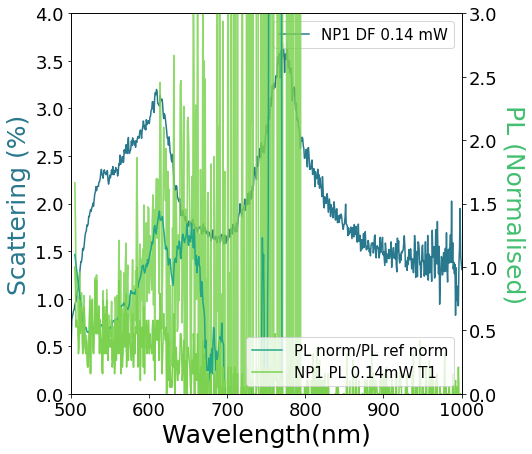

In [328]:
fig1, ax1 = plt.subplots(figsize = (7,7))
NP1_PL = data_sorted[58]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[58]
NP1_DF = data_sorted[57] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)

#ax1.plot(wl_ref_norm, pl_ref_norm)
ax2 = ax1.twinx()
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[400], alpha = 0.6)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[400], alpha = 0.6)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax1.plot(wl, NP1_DF*100, color = colours_1[200], label = "NP1 DF 0.14 mW")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 0.14mW T1", color = colours_1[400])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax2.set_ylim(0,3)
ax2.legend(fontsize = 15, loc = "lower right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP1_0.14mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


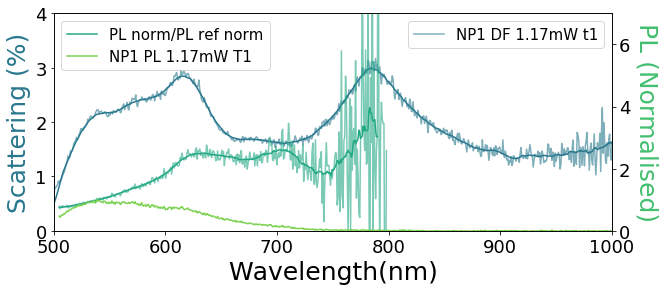

In [335]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[60]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[60]
NP1_DF = data_sorted[59] - NP1_PL_scat
NP1_PL_test = sig.savgol_filter(NP1_PL, 23,3)

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP1 DF 1.17mW t1", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.6)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 1.17mW T1", color = colours_1[400])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax2.set_ylim(0,7)
ax2.legend(fontsize = 15, loc = "upper left")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP1_1.17mW_t1.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


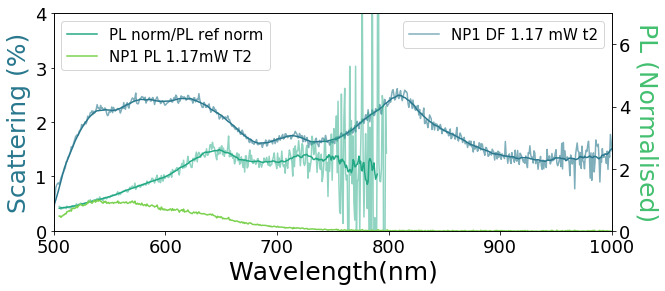

In [359]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[62]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[62]
NP1_DF = data_sorted[61] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP1 DF 1.17 mW t2", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 1.17mW T2", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP1_1.17mW_t2.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


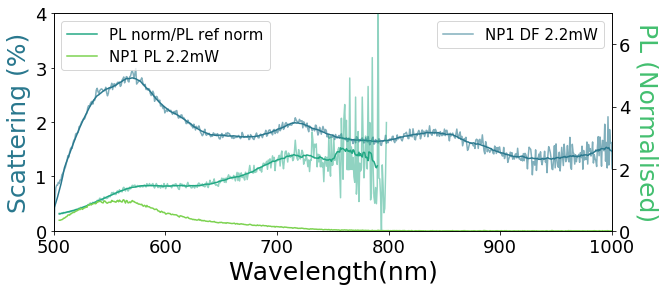

In [358]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[66]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[66]
NP1_DF = data_sorted[65] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP1 DF 2.2mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 2.2mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP1_2.2mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


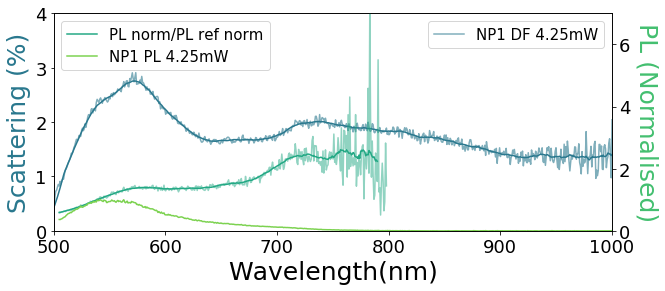

In [355]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[70]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[70]
NP1_DF = data_sorted[69] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP1 DF 4.25mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP1 PL 4.25mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP1_4.25mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


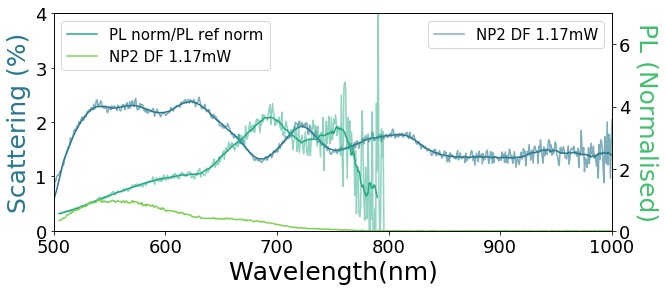

In [354]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[78]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[78]
NP1_DF = data_sorted[77] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP2 DF 1.17mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP2 DF 1.17mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP2_1.17mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


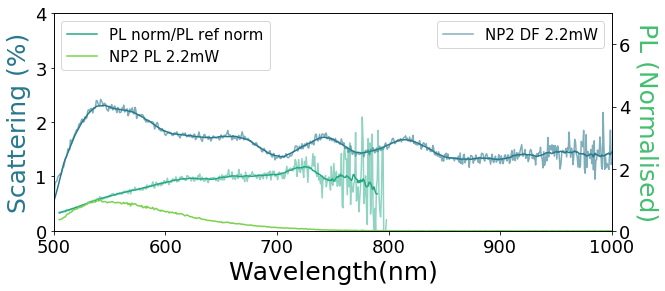

In [360]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[89]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[89]
NP1_DF = data_sorted[88] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP2 DF 2.2mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP2 PL 2.2mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP2_2.2mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


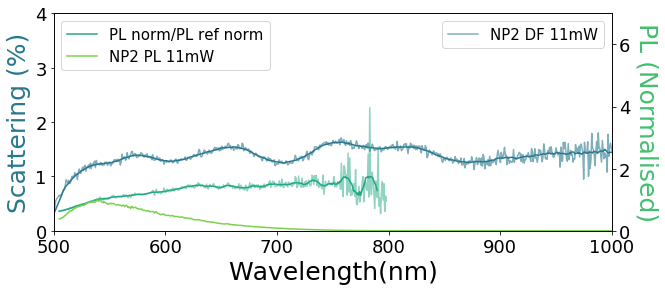

In [352]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[105]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[105]
NP1_DF = data_sorted[104] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,3)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP2 DF 11mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP2 PL 11mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP2_11mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


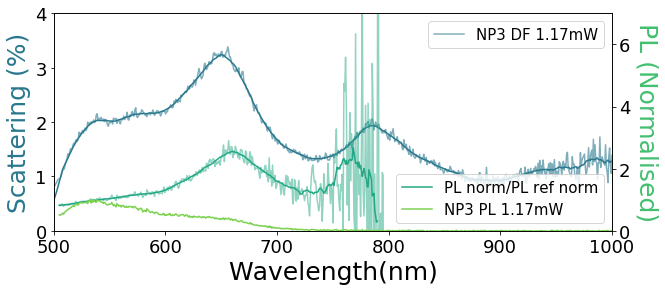

In [351]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[121]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[121]
NP1_DF = data_sorted[120] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP3 DF 1.17mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP3 PL 1.17mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "lower right")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP3_1.17mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


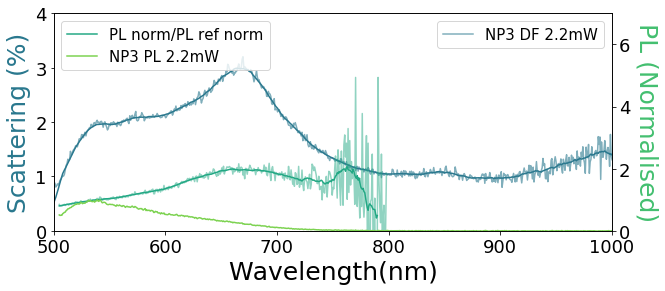

In [361]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[133]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[133]
NP1_DF = data_sorted[132] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP3 DF 2.2mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP3 PL 2.2mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP3_2.2mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


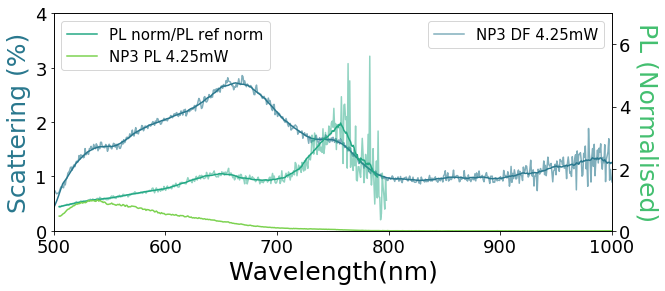

In [346]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[149]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[149]
NP1_DF = data_sorted[148] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP3 DF 4.25mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP3 PL 4.25mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP3_4.25mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


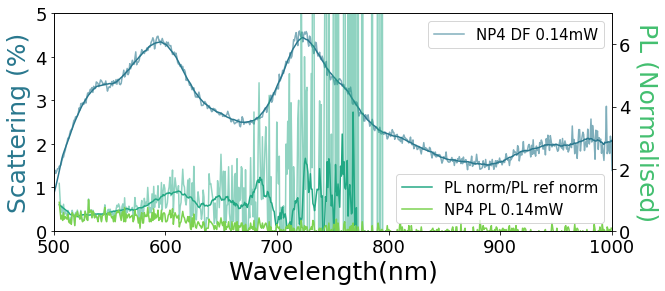

In [347]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[162]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[162]
NP1_DF = data_sorted[161] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 0.14mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 0.14mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "lower right")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_0.14mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


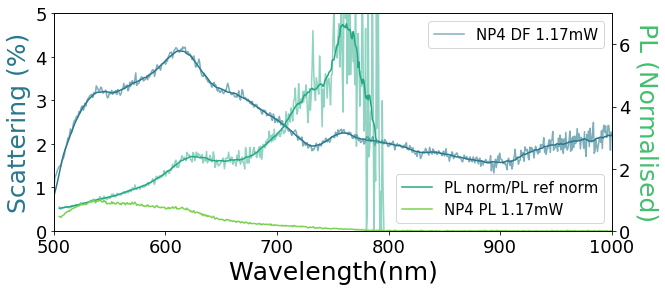

In [345]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[173]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[173]
NP1_DF = data_sorted[172] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 1.17mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 1.17mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "lower right")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_1.17mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


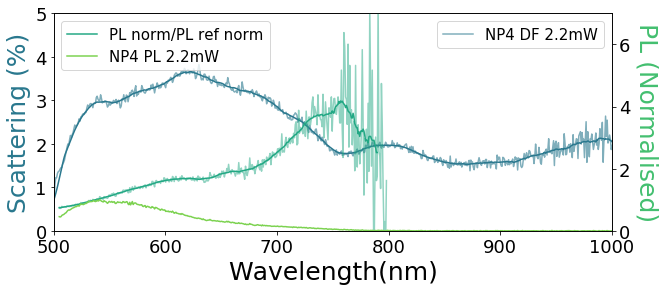

In [340]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[193]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[193]
NP1_DF = data_sorted[192] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 2.2mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 2.2mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_2.2mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


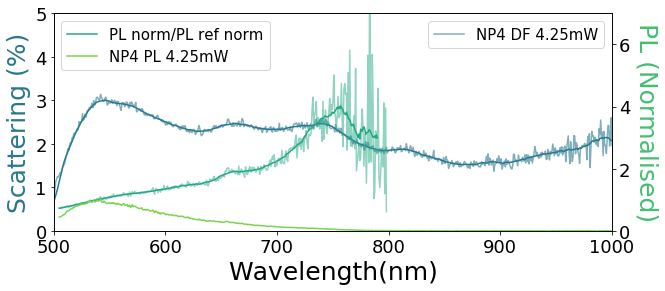

In [339]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[209]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[209]
NP1_DF = data_sorted[208] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 4.25mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 4.25mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_4.25mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


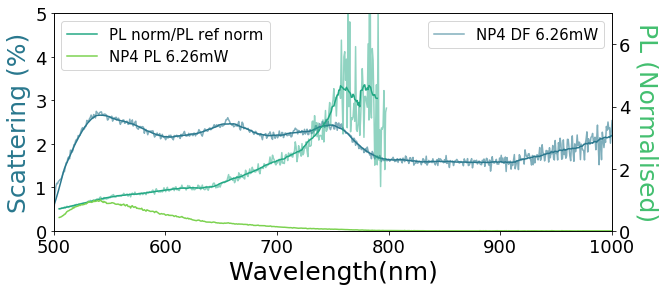

In [338]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[220]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[220]
NP1_DF = data_sorted[219] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 6.26mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 6.26mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_6.26mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


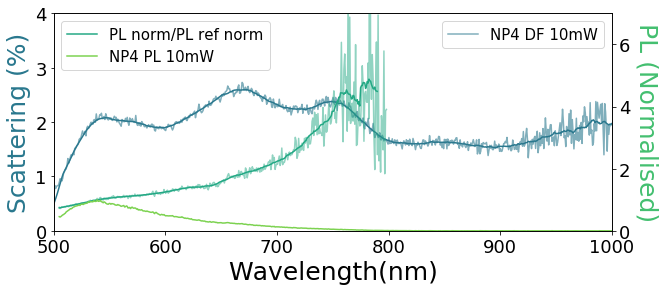

In [337]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[232]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[232]
NP1_DF = data_sorted[231] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 800
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 10mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,4)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 10mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_10mW.png',  bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


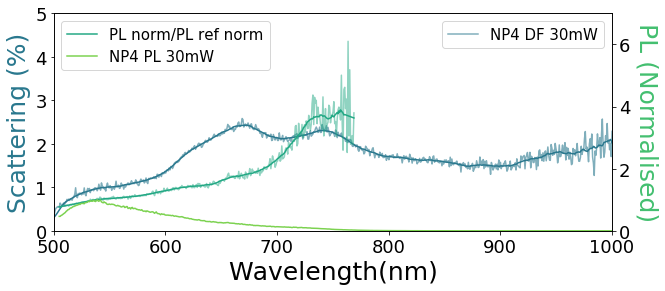

In [336]:
fig1, ax1 = plt.subplots(figsize = (10,4))
NP1_PL = data_sorted[243]*(reference_3 - back_3)
NP1_PL_scat = data_sorted[243]
NP1_DF = data_sorted[242] - NP1_PL_scat

PL_ref = WS2_surf_PL*(reference_2 - back_2)

norm_start_wl = 505; #Wavelength to normalised from
norm_fin_wl = 1000
norm_start = (np.abs(wl - norm_start_wl)).argmin()
norm_fin = (np.abs(wl - norm_fin_wl)).argmin()

inf_norm_ref = np.linalg.norm(PL_ref[norm_start:norm_fin], axis=0, ord = np.inf)
pl_ref_norm = PL_ref[norm_start:norm_fin]/inf_norm_ref
wl_ref_norm = wl[norm_start:norm_fin]

inf_norm_NP1 = np.linalg.norm(NP1_PL[norm_start:norm_fin], axis=0, ord = np.inf)
NP1_PL_norm = NP1_PL[norm_start:norm_fin]/inf_norm_NP1

cut_off_wl = 770
cutoff_ind = (np.abs(wl[norm_start:norm_fin]- cut_off_wl)).argmin()
refd_PL_NP1 = NP1_PL_norm[:cutoff_ind]/pl_ref_norm[:cutoff_ind]
wl_refd_PL_NP1 = wl_ref_norm[:cutoff_ind]

refd_PL_NP1_sm = sig.savgol_filter(refd_PL_NP1, 23,1)
NP1_DF_sm = sig.savgol_filter(NP1_DF, 23,1)

ax2 = ax1.twinx()
ax1.plot(wl, NP1_DF*100, label = "NP4 DF 30mW", color = colours_1[200], alpha = 0.6)
ax1.plot(wl, NP1_DF_sm*100, color = colours_1[200])
ax1.set_xlim(500, 1000)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax1.set_ylim(0,5)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1, color = colours_1[300], alpha = 0.5)
ax2.plot(wl_refd_PL_NP1, refd_PL_NP1_sm, color = colours_1[300], label = "PL norm/PL ref norm")
ax2.plot(wl_ref_norm, NP1_PL_norm, label = "NP4 PL 30mW", color = colours_1[400])
ax2.set_ylim(0,7)
ax2.set_ylabel("PL (Normalised)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax2.legend(fontsize = 15, loc = "upper left")
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/180927 sample/NP4_30mW.png',  bbox_inches='tight')


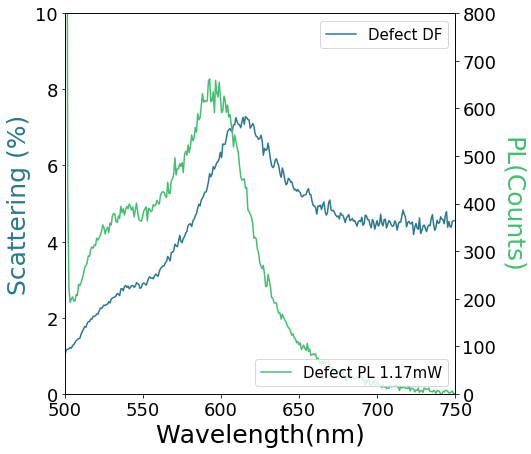

In [505]:
fig1, ax1 = plt.subplots(figsize = (7,7))

ax1.plot(wl, data_sorted[263]*100, label = "Defect DF", color = colours_1[200])
ax2 = ax1.twinx()
ax2.plot(wl, data_sorted_raw[249], label = "Defect PL 1.17mW", color = colours_1[350])
ax1.set_xlim(500, 750)
ax1.set_ylabel("Scattering (%)", fontsize = 25, color = colours_1[200])
ax2.set_ylabel("PL(Counts)", fontsize = 25, color = colours_1[350], rotation = -90, va = "bottom")
ax1.set_xlabel("Wavelength(nm)", fontsize = 25)
ax2.set_ylim(0,800)
ax1.legend(fontsize = 15, loc = "upper right")
ax2.legend(fontsize = 15, loc = "lower right")
ax1.set_ylim(0,10)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Defect_PL_131228.png',  bbox_inches='tight')
